## Table of Contents
1. [Import and Clean Data](#1.-Import-and-Clean-Data)
    - [Clean data](#1.1-Clean-data)
2. [Exploratory Data Analysis (EDA)](#2.-Exploratory-Data-Analysis-(EDA))
3. [Transformation](#3.-Transformation)
    - [Dummy encoding](#3.1-Dummy-encoding)
        - [Variable correlation](#3.1.1-variable-correlation)
    - [Standardization](#3.2-Standardization)
    - [Dataset splitting](#3.3-Dataset-splitting)
    - [SMOTE](#3.4-SMOTE)
4. [Modeling](#4.-Modeling)
5. [Evaluation](#5.-Evaluation)
    - [Interpreting the Coefficients](#5.1-Interpreting-the-Coefficients)
    - [Visualizing model performance](#5.2-Visualizing-model-performance)

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import imblearn
from imblearn.over_sampling import SMOTE 
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_recall_curve, PrecisionRecallDisplay
import sys
import warnings
warnings.filterwarnings("ignore")

In [2]:
# python and library version
print('Python version: ', sys.version)
print('Numpy version: ', np.__version__)
print('Pandas version: ', pd.__version__)
print('Matplotlib version: ', matplotlib.__version__)
print('Seaborn version: ', sns.__version__)
print('Imblearn version:', imblearn.__version__)
print('Scikit-learn version: ', sklearn.__version__)

Python version:  3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)]
Numpy version:  1.26.1
Pandas version:  2.1.2
Matplotlib version:  3.8.1
Seaborn version:  0.13.0
Imblearn version: 0.11.0
Scikit-learn version:  1.3.2


## 1. Import and Clean Data

In [3]:
data = pd.read_csv("data/general_data.csv",sep=",")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Attrition                4410 non-null   object 
 1   Age                      4410 non-null   int64  
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

```Attrition``` is a dichotomous ("Yes/No") field that indicates if the employee left the organization. This variable will serve as our response variable. The other columns listed are potential predictor variables. We should do some exploratory data analysis to see which variables have the most potential for modeling. 

In [5]:
pd.set_option("display.max_columns", None)
data.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,No,51,Travel_Rarely,Sales,5,2,Life_Sciences,1,1,Female,1,Healthcare_Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,1,3,3.0,4.0,3.0
1,No,32,Travel_Frequently,Research_Development,14,4,Other,1,3,Male,4,Sales_Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,2,3.0,2.0,2.0
2,No,38,Non-Travel,Research_Development,2,5,Life_Sciences,1,4,Male,3,Human_Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,3,4,2.0,2.0,4.0
3,No,32,Travel_Rarely,Research_Development,8,1,Medical,1,5,Male,1,Sales_Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,1,3,4.0,4.0,3.0
4,No,46,Travel_Rarely,Research_Development,6,3,Life_Sciences,1,6,Female,4,Research_Director,Married,40710,3.0,Y,13,8,0,28.0,5,7,7,7,3,3,4.0,3.0,2.0


In [6]:
data.shape

(4410, 29)

In [7]:
data.describe().round(1)

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4391.0,4410.0,4410.0,4410.0,4401.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4385.0,4390.0,4388.0
mean,36.9,8.0,2.9,1.0,2205.5,2.1,65029.3,2.7,14.4,8.0,0.8,11.3,2.8,7.0,2.2,4.1,3.0,3.0,2.9,3.1,3.0
std,9.1,7.1,1.0,0.0,1273.2,1.1,47068.9,2.5,4.2,0.0,0.9,7.8,1.3,6.1,3.2,3.6,0.6,0.9,1.1,0.9,0.9
min,18.0,1.0,1.0,1.0,1.0,1.0,10090.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
25%,30.0,2.0,2.0,1.0,1103.2,1.0,29110.0,1.0,12.0,8.0,0.0,6.0,2.0,3.0,0.0,2.0,3.0,2.0,2.0,2.0,2.0
50%,36.0,6.0,3.0,1.0,2205.5,2.0,49190.0,2.0,14.0,8.0,1.0,10.0,3.0,5.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0
75%,43.0,12.0,4.0,1.0,3307.8,3.0,83800.0,4.0,17.0,8.0,1.0,15.0,3.0,9.0,3.0,7.0,3.0,4.0,4.0,4.0,4.0
max,60.0,35.0,5.0,1.0,4410.0,5.0,199990.0,9.0,25.0,8.0,3.0,40.0,6.0,40.0,15.0,17.0,4.0,4.0,4.0,4.0,4.0


By looking at the descriptive, we can quickly see the following statistic is reasonable:
- max, min
- mean

For instant, age is between 18 and 60 which make sense to be employee data.

Also, we can focus on columns that lack variance necessary for value in prediction. Since ```EmployeeCount``` and ```StandardHours``` both have no variation, this makes them poor candidates for prediction.

### 1.1 Clean data

In [8]:
data.isnull().sum()

Attrition                   0
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
PerformanceRating           0
JobInvolvement              0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            22
dtype: int64

My approach of handling missing data is using their mean.

In [9]:
data=data.fillna(data.mean(numeric_only=True))

In [10]:
data.isnull().any()

Attrition                  False
Age                        False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked         False
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears          False
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
PerformanceRating          False
JobInvolvement             False
EnvironmentSatisfaction    False
JobSatisfaction            False
WorkLifeBalance            False
dtype: bool

## 2. Exploratory Data Analysis (EDA)

We will first drop the columns that is not helpful for modeling employee turnover. ```EmployeeCount```, ```StandardHours```, and ```Over18``` should be dropped as they have no variation. ```EmployeeID``` is only used to identify the employee and has no other value.

In [11]:
data.drop(['EmployeeCount','EmployeeID','StandardHours','Over18'],axis=1,inplace=True)

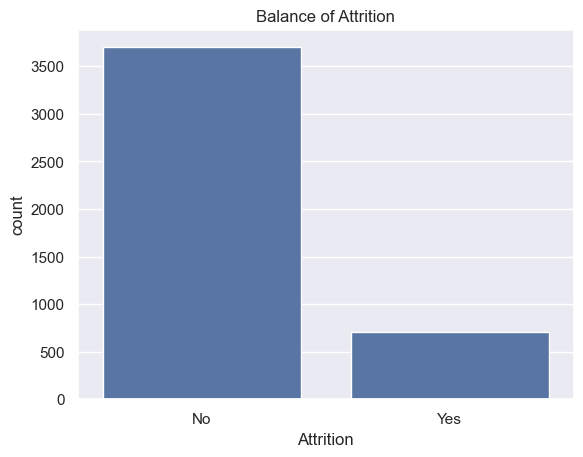

In [12]:
sns.countplot(x = "Attrition",data=data)
plt.title('Balance of Attrition')
plt.show()

We see that our response variable (attrition) has more non-attrition of an employee than attrition of employees. Specifically, only 16% of our data set consists of attrition records. This imbalance can hurt the overall model performance, so we will later use SMOTE to fix this issue in the transformation section.

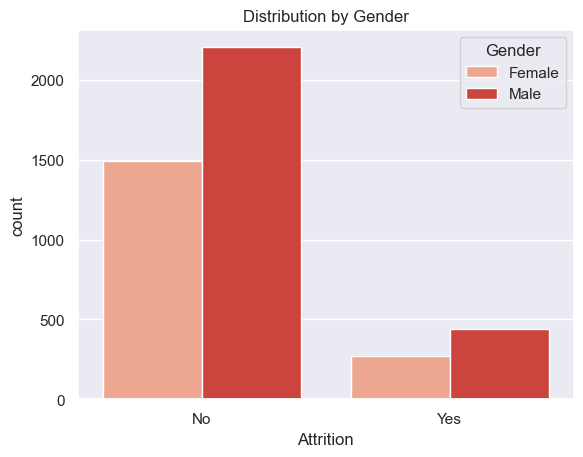

In [13]:
sns.countplot(x = "Attrition",data=data,hue="Gender", palette="Reds")
plt.title('Distribution by Gender')
plt.show()

In [14]:
#Bin the age variable into buckets for easier EDA
data['Age_Bin']=pd.cut(x = data['Age'],
                        bins = [0,30,40,50,60], 
                        labels = ['18-30', '30-40', '40-50','50-60'])

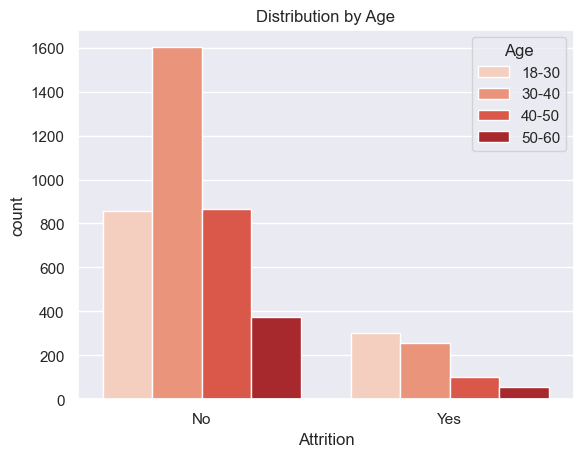

In [15]:
sns.countplot(x = "Attrition",data=data,hue="Age_Bin", palette="Reds")
plt.legend(title='Age')
plt.title('Distribution by Age')
plt.show()

In [16]:
data.drop('Age_Bin', axis=1, inplace=True)

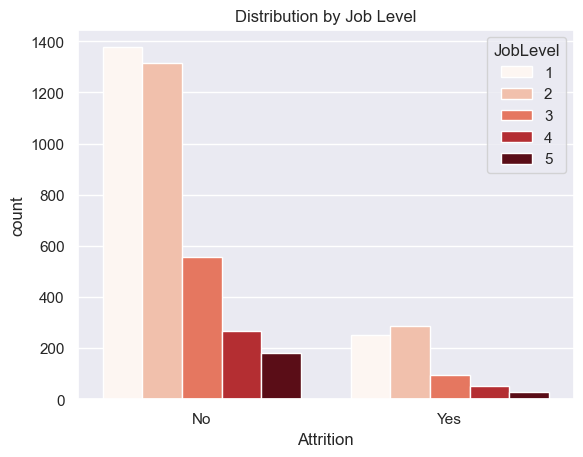

In [17]:
sns.countplot(x = "Attrition",data=data,hue="JobLevel", palette="Reds")
plt.title('Distribution by Job Level')
plt.show()

Let's transform our dependent variable (attrition) from 'yes/no' to '1/0' for better handling.

In [18]:
label_encoder_y=LabelEncoder()
data['Attrition']=label_encoder_y.fit_transform(data['Attrition'])

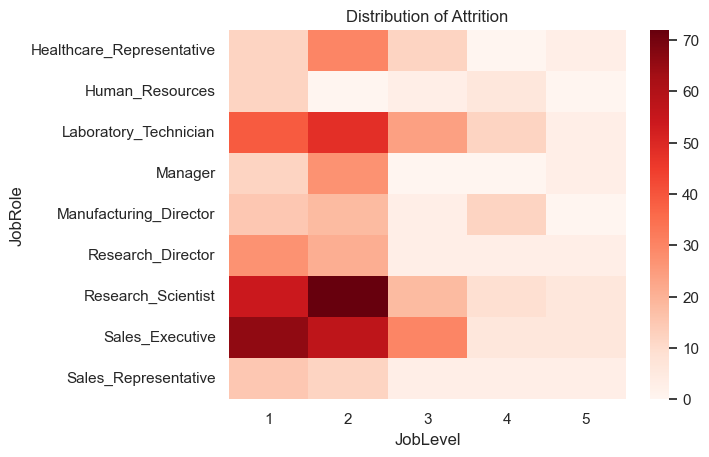

In [19]:
import matplotlib.colors as mcolors
pivot = data.pivot_table(values='Attrition', index='JobRole', columns='JobLevel', aggfunc=sum)
sns.heatmap(pivot, cmap=sns.color_palette("Reds", as_cmap=True))
plt.title('Distribution of Attrition')
plt.show()

The bar charts and heatmap visualization effectively highlights that attrition is not uniformly distributed across the organization. Specifically, it underscores a significant concentration of turnover among Research Scientists and Sales Executives, particularly at the entry-level positions and those who are young. This pattern suggests that our early-career employees in these roles are the most vulnerable to attrition.

## 3. Transformation

This part will transform data to better fit the machine learning model by:
1. dummy encoding
2. standardization
3. dataset splitting
4. SMOTE

Since some of our data is category, we will first use dummy encoding to transform these category column into numeric in order to pass to the machine learning model.

### 3.1 Dummy encoding

In [20]:
columns_to_dummy = ['Gender', 'JobRole', 'BusinessTravel','EducationField', 'MaritalStatus','Department']
encoder = OneHotEncoder(drop='first', sparse=False)

encoder.fit(data[columns_to_dummy])
transformed_data = encoder.transform(data[columns_to_dummy])
# Convert these arrays back to DataFrames
transformed_df = pd.DataFrame(transformed_data, columns=encoder.get_feature_names_out(columns_to_dummy))
non_categorical_data = data.drop(columns=columns_to_dummy)
non_categorical_data.reset_index(drop=True, inplace=True)
transformed_df.reset_index(drop=True, inplace=True)
df = pd.concat([non_categorical_data, transformed_df], axis=1)

For reference, let's view the data in the categorical predictors

In [21]:
print(data['BusinessTravel'].unique())
print(data['EducationField'].unique())
print(data['Gender'].unique())
print(data['Department'].unique())
print(data['JobRole'].unique())
print(data['MaritalStatus'].unique())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Life_Sciences' 'Other' 'Medical' 'Marketing' 'Technical_Degree' 'HR']
['Female' 'Male']
['Sales' 'Research_Development' 'Human_Resources']
['Healthcare_Representative' 'Sales_Executive' 'Human_Resources'
 'Research_Director' 'Laboratory_Technician' 'Manufacturing_Director'
 'Sales_Representative' 'Manager' 'Research_Scientist']
['Married' 'Single' 'Divorced']


After dummy encoding, we can investigate the correlation between attrition rate and other variables.

### 3.1.1 variable correlation

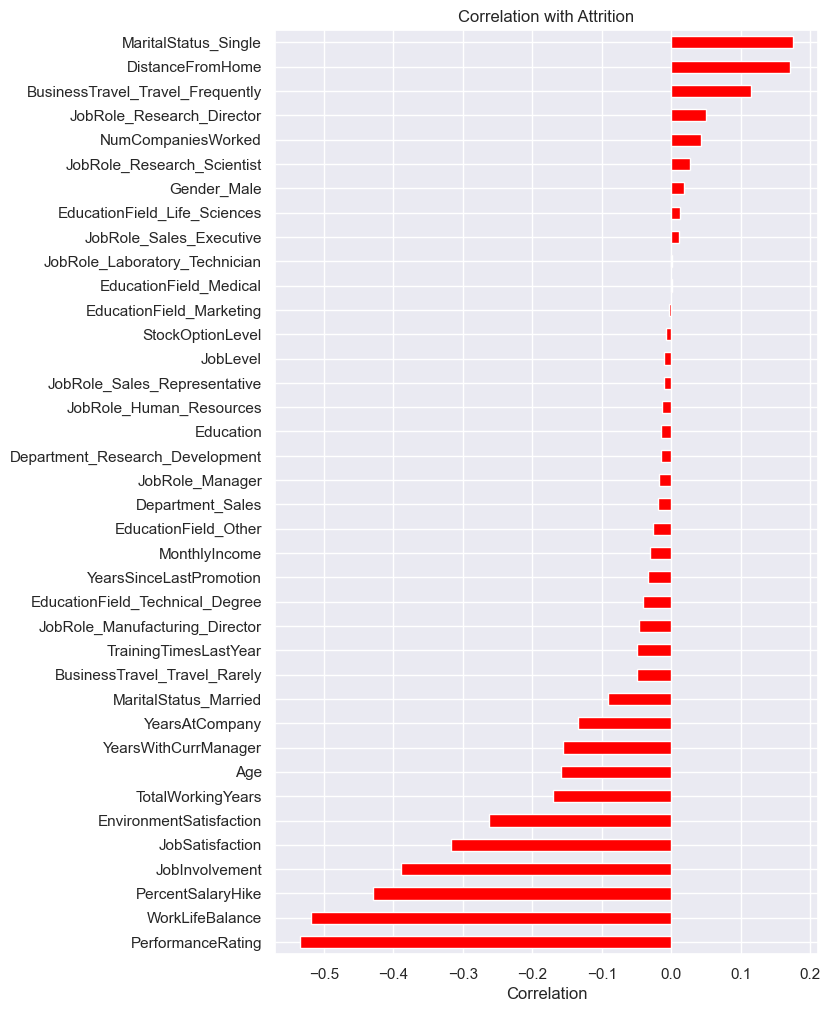

In [22]:
correlation_series = df.corr()['Attrition'].sort_values()
correlation_series = correlation_series.drop('Attrition')
plt.figure(figsize=(7, 12))
correlation_series.plot(kind='barh', color='red')
plt.title('Correlation with Attrition')
plt.xlabel('Correlation')
plt.show()

This chart suggest that these are the factors that are highly correlated with attrition:
- low performance rating
- work life imbalance
- low percent salary hike
- low job involvement
- low job satisfaction
- low environment satisfaction

There are quite many variables that is less correlated to attrition. This finding give us an insight to use L1 regularization when fitting the model.

### 3.2 Standardization

We want to compare the magnitude of the coefficients in the machine learning model. If the underlying variables have different units of measurement and variances (e.g. age vs. monthly income), then the magnitude of the coefficients are not directly comparable. So we standardize the numeric columns, but exclude the binary column.

In [23]:
# standardization
columns_to_standardize = [
    'Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 
    'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 
    'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 
    'PerformanceRating', 'JobInvolvement', 'EnvironmentSatisfaction', 
    'JobSatisfaction', 'WorkLifeBalance'
]
scaler = StandardScaler()
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

### 3.3 Dataset splitting

In [24]:
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 3.4 SMOTE

As said before, in order to fix the imbalance issue in our response variable (Attrition), we use SMOTE to balance it.

In [25]:
smote = SMOTE(random_state=0)
X_sm, y_sm = smote.fit_resample(X_train, y_train)
print(f'''Shape of X before SMOTE: {X_train.shape}
        Shape of X after SMOTE: {X_sm.shape}''')

Shape of X before SMOTE: (3528, 38)
        Shape of X after SMOTE: (5916, 38)


In [26]:
# check that response variable is now balanced
y_sm.mean()

0.5

In [27]:
#Remerge the data
train_smote = pd.concat([y_sm, X_sm], axis=1)
train_smote.shape

(5916, 39)

## 4. Modeling

Since attrition is a binary variable, we will use logistic regression, which is suitable and simple to interpret. Particularly, we use L1 regularization because only some of the variables have medium to high effect on the dependent variable.

In our analysis, the trade-off between Type I and Type II errors is critical. Misclassifying an employee as staying (Type II error) is more detrimental than falsely predicting their departure (Type I error). Thus, minimizing Type II errors is our priority. We will focus on optimizing recall as our performance metrics, adjusting our model's hyperparameter on the validation set to maximize these measures.

In [28]:
logit =  LogisticRegression()  # set up logistic regression

# set up combination of hyperparameter for fine-tune
param_grid = [
    {'C': np.logspace(-4, 4, 10),      # Regularization strength
    'penalty':['l1'],                  # l1 regularization
    'solver': ['liblinear', 'saga'],   # Solvers that support L1
    'max_iter': [100, 200, 300]},      # Maximum iterations to ensure convergence
    {'C': np.logspace(-4, 4, 10),      # Regularization strength
    'penalty':['elasticnet'],          # Balance for l1 and l2 regularization
    'solver': ['saga'],                # Solvers that support elasticnet
    'max_iter': [100, 200, 300]}       # Maximum iterations to ensure convergence
]

# setup the GridSearchCV
grid_search = GridSearchCV(
	logit,
	param_grid,
	cv=5,  # number of fold
	scoring='recall'
)

# fit GridSearchCV
grid_search.fit(X_train, y_train)

print('Best combination of hyperparameter optimized for recall: ', grid_search.best_params_)
print('Best validation recall score: ', grid_search.best_score_)

logit = grid_search.best_estimator_  # get the fine tune model

Best combination of hyperparameter optimized for recall:  {'C': 0.3593813663804626, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best validation recall score:  0.8105263157894738


In [29]:
# detail cross-validation result
grid_search.cv_results_

{'mean_fit_time': array([2.79955864e-03, 2.00009346e-03, 3.00002098e-03, 2.39987373e-03,
        2.99954414e-03, 1.99928284e-03, 2.60009766e-03, 2.19984055e-03,
        2.79970169e-03, 3.59959602e-03, 2.99983025e-03, 2.79965401e-03,
        3.99956703e-03, 1.21999741e-02, 3.99966240e-03, 1.08007431e-02,
        3.79948616e-03, 1.11997604e-02, 7.19990730e-03, 1.69996262e-02,
        6.59918785e-03, 1.65999889e-02, 6.59923553e-03, 1.71997547e-02,
        1.44001007e-02, 6.61995411e-02, 1.62002087e-02, 1.30000257e-01,
        1.52000427e-02, 1.41599655e-01, 2.44002819e-02, 6.67999744e-02,
        2.44002342e-02, 1.32200050e-01, 2.37991333e-02, 1.90399599e-01,
        2.70005703e-02, 6.80003643e-02, 2.60001659e-02, 1.32600307e-01,
        2.54001141e-02, 1.89999485e-01, 2.66000271e-02, 6.86001301e-02,
        2.38004684e-02, 1.37399817e-01, 2.57997513e-02, 2.01000166e-01,
        2.48002529e-02, 6.88004494e-02, 2.17999458e-02, 1.36200142e-01,
        2.53997803e-02, 2.03600216e-01, 2.55995

In [30]:
# pass to test set for final evaluation
predict = logit.predict(X_test)
recall_score(y_test, predict)

0.8936170212765957

## 5. Evaluation

### 5.1 Interpreting the Coefficients

To interpret coefficient of a logistic regression model, 1 unit change in the independent variable produce the coefficient change in the response variable (Attrition). Note that our independent variable is standardized. So, here it may not have the same intuition but we can use this coefficient to compare their strength of impact on attrition.

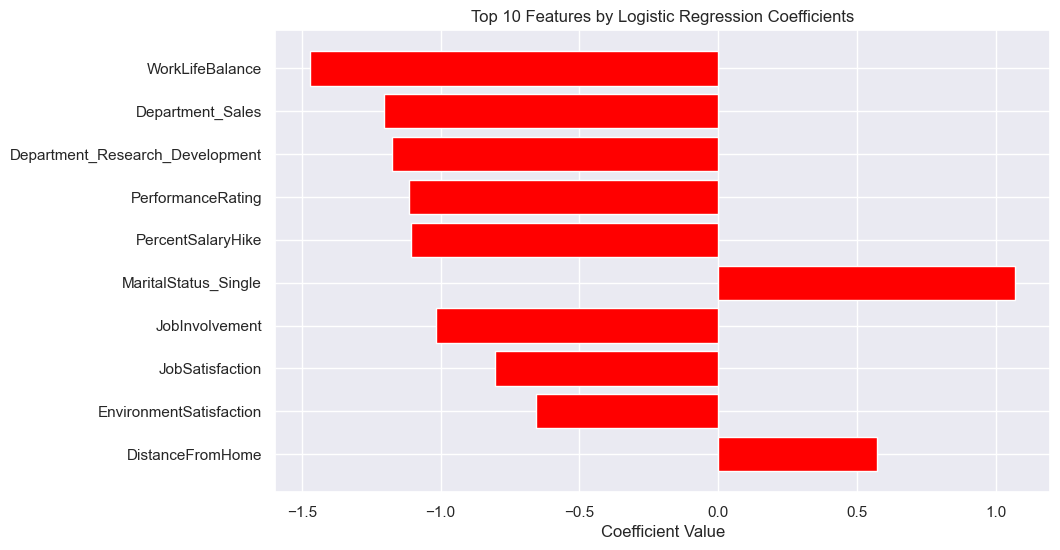

In [31]:
coef_dict = dict(zip(X, logit.coef_[0]))
coef_df = pd.DataFrame(list(coef_dict.items()), columns=['Feature', 'Coefficient'])
top_coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_coef_df['Feature'], top_coef_df['Coefficient'], color='red')
plt.xlabel('Coefficient Value')
plt.title('Top 10 Features by Logistic Regression Coefficients')
plt.gca().invert_yaxis()
plt.show()

Work Life Balance is the most considerable negative coefficient, indicates that employees who feel they have a good balance between their work and personal life are much less likely to leave the company. 

Sales and research department have a significant negative influence on turnover, which could suggest that employees in these departments are less prone to leaving, possibly due to department-specific factors. 

Similarly, a higher performance rating correlates with a lower turnover rate, which might be because high-performing employees receive more recognition, rewards, or satisfaction from their work. 

As expected, Percent Salary Hike also has a negative coefficient, indicate that salary increases contribute to employee retention.

Being single is positive, suggesting that single employees tend to leave more than their non-single counterparts.

### 5.2 Visualizing model performance

We can produce confusion matrices to visualize the TP, FP, TN, and FN.

In [32]:
cm = confusion_matrix(y_test, predict)
print ("Confusion Matrix : \n", cm)
print('Test accuracy = ', accuracy_score(y_test, predict))

Confusion Matrix : 
 [[724  17]
 [ 15 126]]
Test accuracy =  0.963718820861678


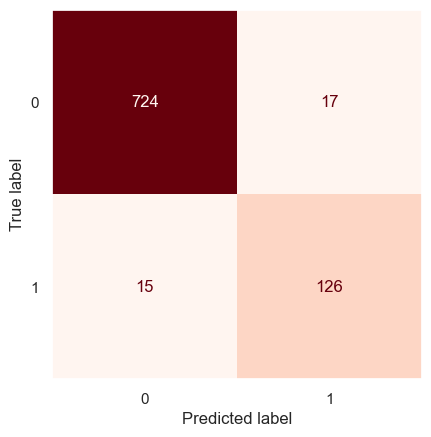

In [33]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Reds, colorbar=False)
plt.grid(False)
plt.show()

We can use classification report to provide a view into precision, recall, and f1-score. It provides these values for the overall model and disaggreagted by response variable outcome (0,1).

In [34]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       741
           1       0.88      0.89      0.89       141

    accuracy                           0.96       882
   macro avg       0.93      0.94      0.93       882
weighted avg       0.96      0.96      0.96       882



The model is performing very well on the majority class. Performance on the minority class is still good.

Visualizing Precision-recall curve is particularly useful for evaluating classifiers on imbalanced datasets or when the detection of the positive class is more crucial than the overall error rate. The area under the curve (AUC) can be a useful metric to summarize the performance of a classifier. A higher area under the precision-recall curve indicates a classifier with both high recall and high precision.

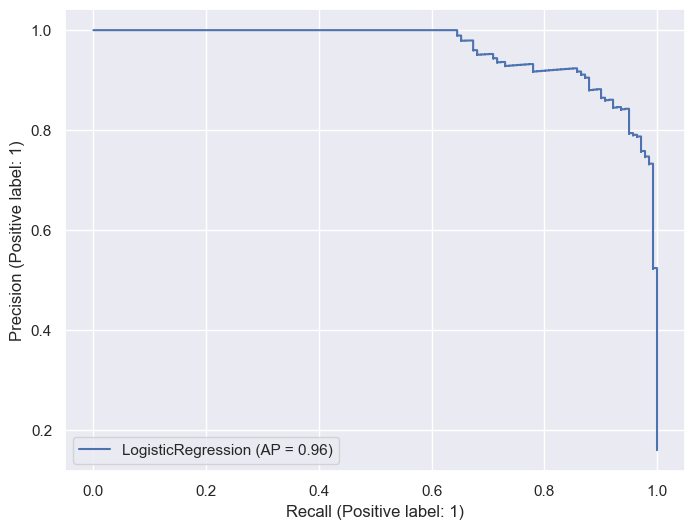

In [35]:
y_scores = logit.decision_function(X_test) # get decision scores
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
fig, ax = plt.subplots(figsize=(8, 6))
PrecisionRecallDisplay.from_estimator(logit, X_test, y_test, ax=ax)